# Machine Learning with Iris Dataset

###### This data set consists of the physical parameters of three species of flower — Versicolor, Setosa and Virginica. The numeric parameters which the dataset contains are Sepal width, Sepal length, Petal width and Petal length. In this data we will be predicting the classes of the flowers based on these parameters.The data consists of continuous numeric values which describe the dimensions of the respective features. We will be training the model based on these features.

## Importing Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
%matplotlib inline

## Load Dataset

In [2]:
iris = pd.read_csv("iris.csv")

In [3]:
iris

,Id,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## Understanding Data

In [4]:
iris.shape

(150, 6)

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 150 non-null    int64  
 1   Sepal Length (cm)  150 non-null    float64
 2   Sepal Width (cm)   150 non-null    float64
 3   Petal Length (cm)  150 non-null    float64
 4   Petal Width (cm)   150 non-null    float64
 5   Species            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
iris.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
Sepal Length (cm),150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
Sepal Width (cm),150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
Petal Length (cm),150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
Petal Width (cm),150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [7]:
iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

###### As you can see after execution of this “iris[“species”].value_counts()” ,the data distribution among setosa, virginica, versicolor are equal so iris dataset is a Balanced dataset (as the number of data points for every class is 50).

## Data Visualization

## Scatter Plot

<AxesSubplot:xlabel='Petal Length (cm)', ylabel='Petal Width (cm)'>

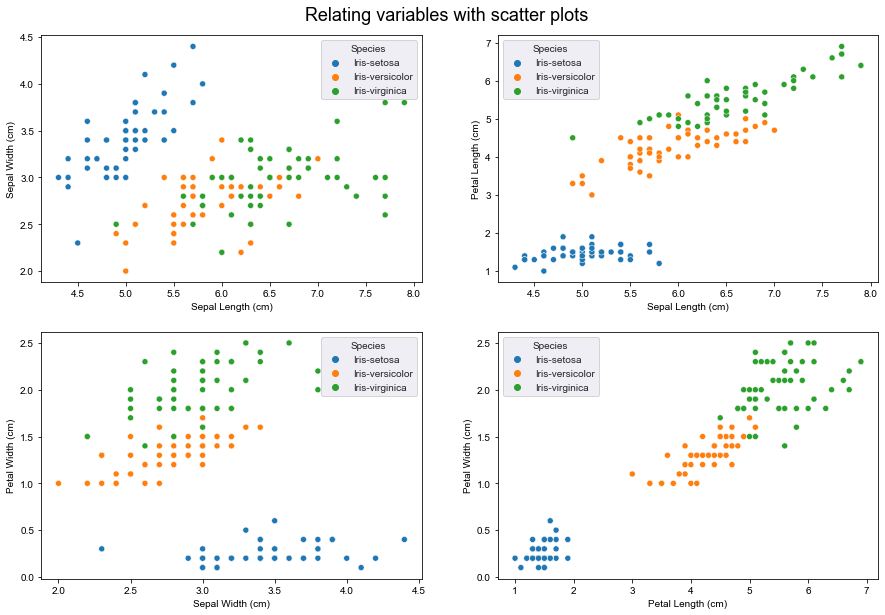

In [8]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
fig.suptitle("Relating variables with scatter plots",y=.92,size=18)
sns.set_style('darkgrid')
sns.scatterplot(data=iris, x="Sepal Length (cm)",y='Sepal Width (cm)',\
                ax=ax[0,0],hue='Species')
sns.scatterplot(data=iris, x="Sepal Length (cm)",y='Petal Length (cm)',\
                ax=ax[0,1],hue='Species')
sns.scatterplot(data=iris, x="Sepal Width (cm)",y='Petal Width (cm)',\
                ax=ax[1,0],hue='Species')
sns.scatterplot(data=iris, x="Petal Length (cm)",y='Petal Width (cm)',\
                ax=ax[1,1],hue='Species')

In [9]:
numerical = iris.select_dtypes('number').columns.drop('Id')

## Histplot

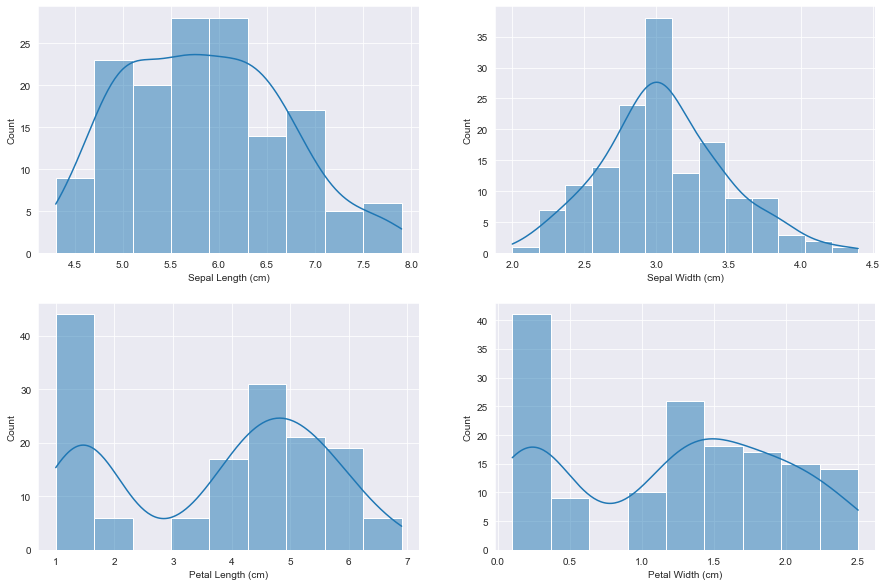

In [10]:
plt.figure(figsize=(15,10))
for i,col in enumerate(numerical):
    ax = plt.subplot(2,2, i+1)
    sns.histplot(data=iris, x=col,ax=ax,kde=True)

## Boxplot

<AxesSubplot:xlabel='Species', ylabel='Petal Length (cm)'>

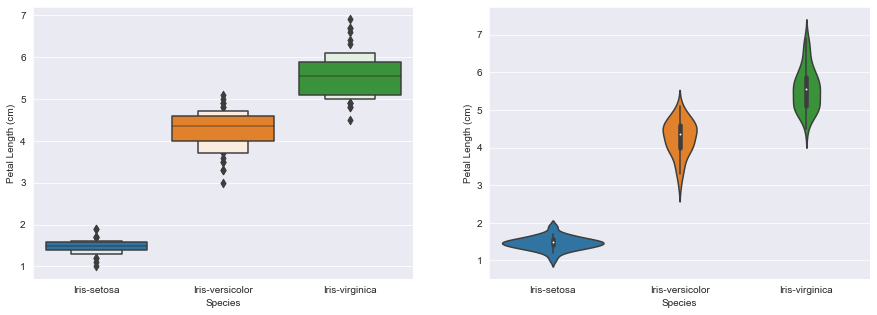

In [11]:
plt.figure(figsize=(15,5))
ax1 = plt.subplot(1,2,1)
sns.boxenplot(data=iris, x="Species",y="Petal Length (cm)")
ax2 = plt.subplot(1,2,2)
sns.violinplot(x="Species",y="Petal Length (cm)", data=iris)

## Distribution of Petal Length

C:\Users\imanr\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


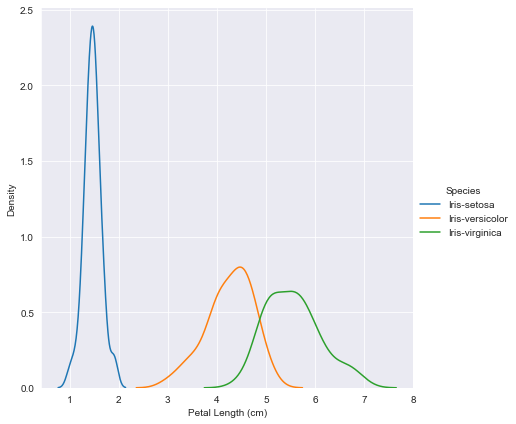

In [12]:
sns.FacetGrid(iris, hue="Species", size=6).map(sns.kdeplot, "Petal Length (cm)")\
.add_legend()

## Pair Plot

###### Another useful seaborn plot is a hybrid plot called pairplot, which shows the bivariate relation between each pair of features. Lets see the same

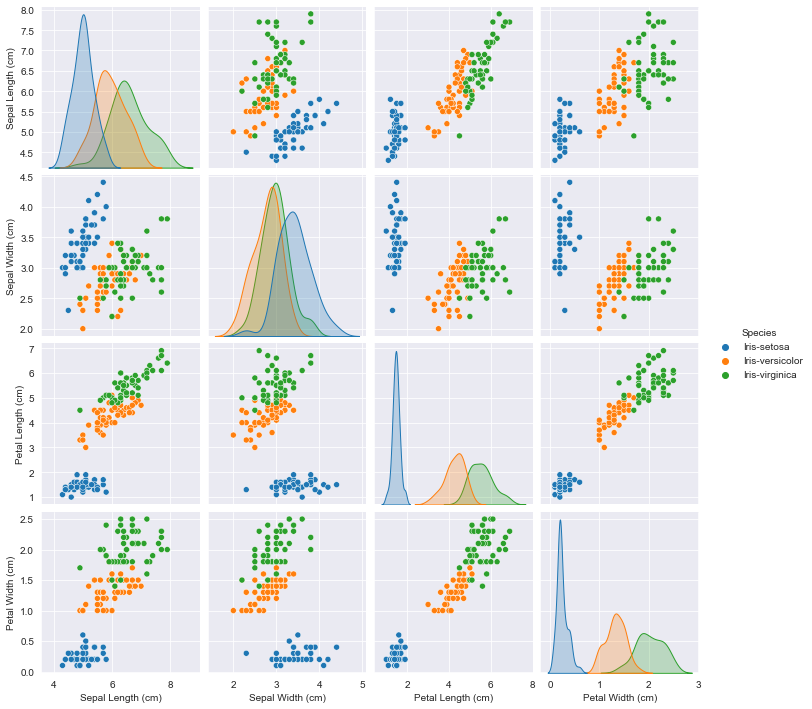

In [13]:
sns.pairplot(data=iris.drop("Id",axis=1),hue='Species')

## Separate independent and dependent data for classification

In [14]:
x = iris.drop("Id",axis=1).iloc[:,:-1].values
y = iris.iloc[:,-1].values

## Splitng the Dataset to Training Set and Test Set

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

## Feature Scaling

In [16]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

## Classification Models

## Logistic Regression

In [17]:
Lg_classifier = LogisticRegression()
Lg_classifier.fit(x_train,y_train)

LogisticRegression()

## Making the Confusion Matrix

In [18]:
y_pred = Lg_classifier.predict(x_test)
confusion_matrix(y_test,y_pred)
print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted']),'\n')
print(f"accuracy_score is: {accuracy_score(y_test,y_pred)}")

Predicted        Iris-setosa  Iris-versicolor  Iris-virginica
True                                                         
Iris-setosa               11                0               0
Iris-versicolor            0                6               7
Iris-virginica             0                0               6 

accuracy_score is: 0.7666666666666667


## Compare prediction with y_test

In [19]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[['Iris-virginica' 'Iris-virginica']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-versicolor']
 ['Iris-virginica' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-virginica' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-virginica' 'Iris-versicolor']
 ['Iris-virginica' 'Iris-versicolor']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-virginica' 'Iris-versicolor']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris

## K Nearest Neighbor

In [20]:
train_scores = []
test_scores = []
# appending 14 knn score to lists
for i in range(1,15):
    knn_classifier = KNeighborsClassifier(n_neighbors=i)
    knn_classifier.fit(x_train,y_train)
    train_scores.append(knn_classifier.score(x_train,y_train))
    test_scores.append(knn_classifier.score(x_test,y_test))
    
# get maximum index of trian score
max_train_score = max(train_scores)
train_score_index = [i for i,v in enumerate(train_scores) if v == max_train_score]
print(f"Max Train Score Is {max_train_score * 100}% and K ={list(map(lambda x :x+1,train_score_index))}")

# get maximum index of test score
max_test_score = max(test_scores)
test_score_index = [i for i,v in enumerate(test_scores) if v == max_test_score]
print(f"Max Test Score Is {max_test_score * 100}% and K ={list(map(lambda x :x+1,test_score_index))}",'\n')

# Confusion Matrix
knn_cls = KNeighborsClassifier(4)
knn_cls.fit(x_train,y_train)
y_pred = knn_cls.predict(x_test)
confusion_matrix(y_test,y_pred)
print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted']),'\n')
print(f"accuracy score is : {accuracy_score(y_test,y_pred)}",'\n')

# Compare prediction with y_test
print(np.concatenate((y_test.reshape(len(y_test),1), y_pred.reshape(len(y_pred),1)),1))

Max Train Score Is 100.0% and K =[1]
Max Test Score Is 90.0% and K =[4, 6, 8] 

Predicted        Iris-setosa  Iris-versicolor  Iris-virginica
True                                                         
Iris-setosa               11                0               0
Iris-versicolor            0               10               3
Iris-virginica             0                0               6 

accuracy score is : 0.9 

[['Iris-virginica' 'Iris-virginica']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-virginica']
 ['Iris-setosa' 'Iris-setosa']

## Training the SVM model on the Training set

In [21]:
svm_cls = SVC(kernel="linear",random_state=0)
svm_cls.fit(x_train,y_train)

# Confusion Matrix
y_pred = svm_cls.predict(x_test)
confusion_matrix(y_test,y_pred)
print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted']),'\n')
print(f"accuracy score is :{accuracy_score(y_test,y_pred)} ",'\n')

# Compare prediction with y_test
print(np.concatenate((y_test.reshape(len(y_test),1), y_pred.reshape(len(y_pred),1)),1))

Predicted        Iris-setosa  Iris-versicolor  Iris-virginica
True                                                         
Iris-setosa               11                0               0
Iris-versicolor            0                9               4
Iris-virginica             0                0               6 

accuracy score is :0.8666666666666667  

[['Iris-virginica' 'Iris-virginica']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-virginica']
 ['Iris-versicolor' 'Iris-virginica']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-versicolor' 'Iris-virginica']
 ['Iris-versicolor' 'Iris-v

## Training the Kernel SVM model on the Training set

In [22]:
kernel_svm = SVC(kernel="rbf",random_state=0)
kernel_svm.fit(x_train,y_train)

# Confusion Matrix
y_pred = kernel_svm.predict(x_test)
confusion_matrix(y_test,y_pred)
print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted']),'\n')
print(f"accuracy score is :{accuracy_score(y_test,y_pred)} ",'\n')

# Compare prediction with y_test
print(np.concatenate((y_test.reshape(len(y_test),1),y_pred.reshape(len(y_pred),1)),1))

Predicted        Iris-setosa  Iris-versicolor  Iris-virginica
True                                                         
Iris-setosa               11                0               0
Iris-versicolor            0                7               6
Iris-virginica             0                0               6 

accuracy score is :0.8  

[['Iris-virginica' 'Iris-virginica']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-versicolor' 'Iris-virginica']
 ['Iris-versicolor' 'Iris-virginica']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-virginica']
 ['Iris-versicolor' 'Iris-virginica']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-versicolor' 'Iris-virginica']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Ir

## Training the Naive Bayes model on the Training set

In [23]:
naive_cls = GaussianNB()
naive_cls.fit(x_train,y_train)

# Confusion Matrix
y_pred = naive_cls.predict(x_test)
confusion_matrix(y_test,y_pred)
print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted']),'\n')
print(f"accuracy score is :{accuracy_score(y_test,y_pred)} ",'\n')

# Compare prediction with y_test
print(np.concatenate((y_test.reshape(len(y_test),1),y_pred.reshape(len(y_pred),1)),1))

Predicted        Iris-setosa  Iris-versicolor  Iris-virginica
True                                                         
Iris-setosa               11                0               0
Iris-versicolor            0                7               6
Iris-virginica             0                0               6 

accuracy score is :0.8  

[['Iris-virginica' 'Iris-virginica']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-versicolor' 'Iris-virginica']
 ['Iris-versicolor' 'Iris-virginica']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-versicolor' 'Iris-virginica']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-virginica']
 ['Iris-versicolor' 'Iris-virginica']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-versicolor' 'Iris-virginica']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iri

## Training the Decision Tree Classification model on the Training set

In [24]:
dt_cls = DecisionTreeClassifier(criterion='entropy',random_state=0)
dt_cls.fit(x_train,y_train)

# Confusion Matrix
y_pred = dt_cls.predict(x_test)
confusion_matrix(y_test,y_pred)
print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted']),'\n')
print(f"accuracy score is :{accuracy_score(y_test,y_pred)} ",'\n')
# Compare Prediction With y_test
print(np.concatenate((y_test.reshape(len(y_test),1),y_pred.reshape(len(y_pred),1)),1))

Predicted        Iris-setosa  Iris-versicolor  Iris-virginica
True                                                         
Iris-setosa               11                0               0
Iris-versicolor            0                9               4
Iris-virginica             0                0               6 

accuracy score is :0.8666666666666667  

[['Iris-virginica' 'Iris-virginica']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-versicolor' 'Iris-virginica']
 ['Iris-versicolor' 'Iris-virginica']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-versicolor' 'Iris-virginica']
 ['Iris-versicolor' 'Iris-v

## Training the Random Forest Classification model on the Training set

In [25]:
rf_cls = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf_cls.fit(x_train, y_train)

# Confusion Matrix
y_pred = rf_cls.predict(x_test)
confusion_matrix(y_test,y_pred)
print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted']),'\n')
print(f"accuracy score is :{accuracy_score(y_test,y_pred)} ",'\n')

# Compare Prediction With y_test
print(np.concatenate((y_test.reshape(len(y_test),1),y_pred.reshape(len(y_pred),1)),1))

Predicted        Iris-setosa  Iris-versicolor  Iris-virginica
True                                                         
Iris-setosa               11                0               0
Iris-versicolor            0               10               3
Iris-virginica             0                1               5 

accuracy score is :0.8666666666666667  

[['Iris-virginica' 'Iris-virginica']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-versicolor' 'Iris-virginica']
 ['Iris-versicolor' 'Iris-virginica']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-virginica' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-virginica']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-